# **(Lập trình) Cho dữ liệu Mushroom4, chứa các thông tin đặc điểm của nhiều loại nấm cùng với phân loại ‘class’ là nấm độc (poisonous=p) hay ăn được (edible=e).Sử dụng câu lệnh sau để chia dữ liệu đầu vào thành hai phần huấn luyện 70% và**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
print("Huỳnh Thị Trúc Lam - 6351071040")

# Đọc dữ liệu
df = pd.read_csv("/content/mushrooms.csv")

# In số lượng dòng
print("Số dòng dữ liệu:", df.shape[0])

Huỳnh Thị Trúc Lam - 6351071040
Số dòng dữ liệu: 8124


**Yêu cầu 4:** Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

In [ ]:
fearures = df.drop(columns=["class"], axis=1)
labels = df["class"]
print("\nHuỳnh Thị Trúc Lam - 6351071040")

print("Kích thước của đặc trưng:", fearures.shape)
print("Kích thước của nhãn:", labels.shape)


Huỳnh Thị Trúc Lam - 6351071040
Kích thước của đặc trưng: (8124, 22)
Kích thước của nhãn: (8124,)


**Yêu cầu 5:** Chuyển đổi các cột không phải dạng số về dạng one-hot
vector để phù hợp với đầu vào của thư viện.

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")
fearures_onehot=pd.get_dummies(
    fearures,
    columns=fearures.select_dtypes(exclude=["int64", "float64"]).columns,
    drop_first=True   # tránh đa cộng tuyến
)

fearures_onehot


Huỳnh Thị Trúc Lam - 6351071040


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


**Yêu cầu 6:** Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử (7:3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    fearures_onehot, labels, test_size=0.3, random_state=42
)

print("Kích thước tập huấn luyện X_train:", X_train.shape)
print("Kích thước tập kiểm thử X_test:", X_test.shape)
print("Kích thước nhãn huấn luyện y_train:", y_train.shape)
print("Kích thước nhãn kiểm thử y_test:", y_test.shape)

print("\nHuỳnh Thị Trúc Lam - 6351071040")

Kích thước tập huấn luyện X_train: (5686, 95)
Kích thước tập kiểm thử X_test: (2438, 95)
Kích thước nhãn huấn luyện y_train: (5686,)
Kích thước nhãn kiểm thử y_test: (2438,)

Huỳnh Thị Trúc Lam - 6351071040


**Yêu cầu 7:** Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

In [ ]:
# Khởi tạo mô hình Decision Tree Classifier với tiêu chí 'entropy' (tương tự ID3)
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
id3_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Dự đoán trên tập kiểm thử
y_pred = id3_tree.predict(X_test)

# Tính toán và in ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("=== MA TRẬN NHẦM LẪN ===")
print(conf_matrix)

# Tính toán và in độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy): {accuracy:.2f}")

# In báo cáo phân loại chi tiết
print("\n=== BÁO CÁO PHÂN LOẠI ===")
print(classification_report(y_test, y_pred))

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN NHẦM LẪN ===
[[1257    0]
 [   0 1181]]

Độ chính xác (Accuracy): 1.00

=== BÁO CÁO PHÂN LOẠI ===
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Huỳnh Thị Trúc Lam - 6351071040


Biểu diễn cây ID3:


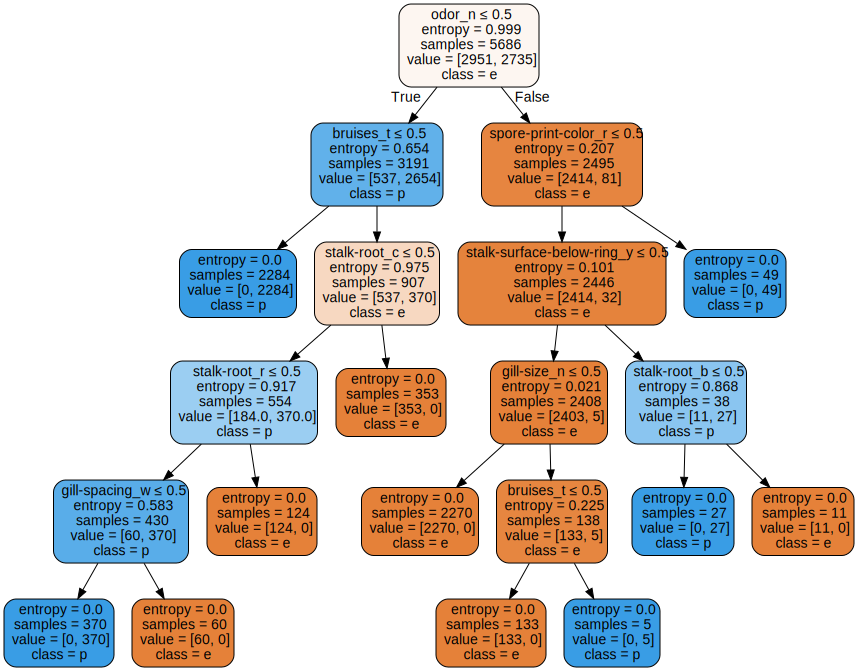


Huỳnh Thị Trúc Lam - 6351071040


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Xuất cây quyết định sang định dạng DOT
dot_data = export_graphviz(
    id3_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(c) for c in id3_tree.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# Tạo đối tượng Graphviz từ chuỗi DOT
graph = graphviz.Source(dot_data)

# Lưu và hiển thị cây quyết định
# graph.render("id3_tree", format="png", view=True) # Để lưu file ảnh và tự động mở

print("Biểu diễn cây ID3:")
display(graph)

print("\nHuỳnh Thị Trúc Lam - 6351071040")


Huỳnh Thị Trúc Lam - 6351071040


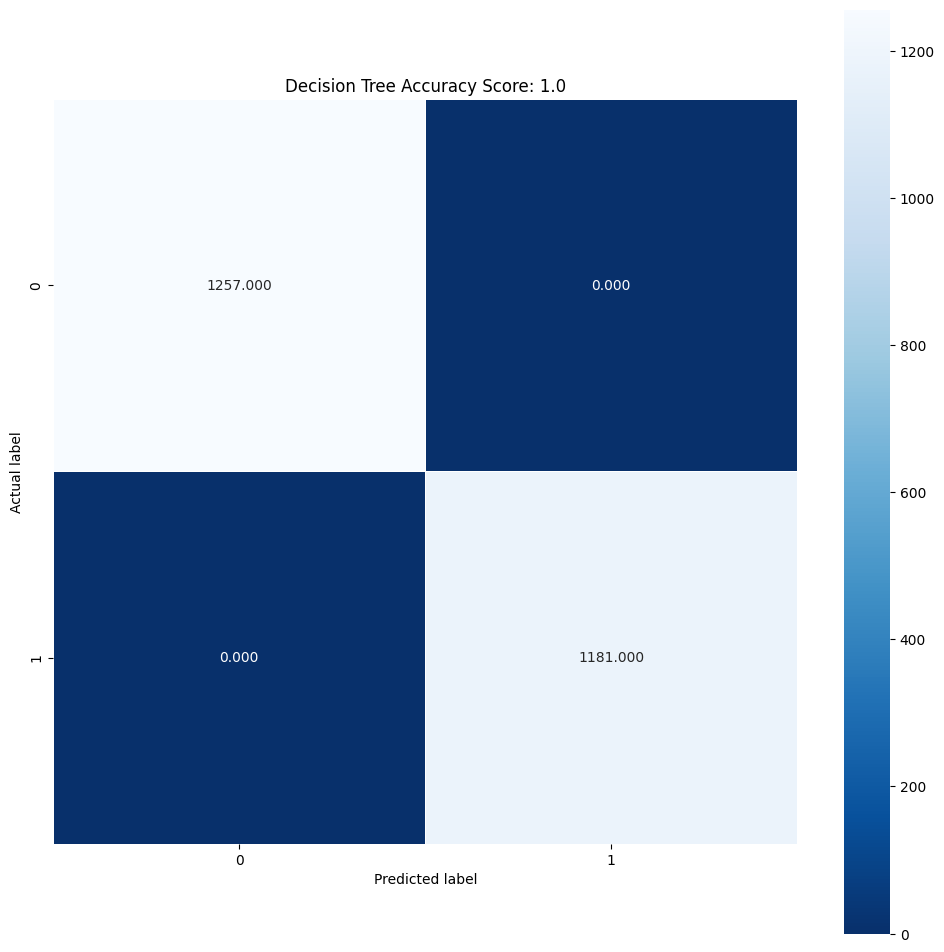

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"Decision Tree Accuracy Score: {accuracy_score(y_test, y_pred)}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nHuỳnh Thị Trúc Lam - 6351071040")

**Yêu cầu 8:** Lặp lại yêu cầu 7 đối với cây CART.

In [ ]:
# Khởi tạo mô hình Decision Tree Classifier với tiêu chí 'gini' (mặc định, tương tự CART)
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
cart_tree.fit(X_train, y_train)

print("Đã huấn luyện cây CART thành công!")
print("\nHuỳnh Thị Trúc Lam - 6351071040")

Đã huấn luyện cây CART thành công!

Huỳnh Thị Trúc Lam - 6351071040


In [ ]:
# Dự đoán trên tập kiểm thử
y_pred_cart = cart_tree.predict(X_test)

# Tính toán và in ma trận nhầm lẫn
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)
print("=== MA TRẬN NHẦM LẪN (CART) ===")
print(conf_matrix_cart)

# Tính toán và in độ chính xác
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f"\nĐộ chính xác (Accuracy) của cây CART: {accuracy_cart:.2f}")

# In báo cáo phân loại chi tiết
print("\n=== BÁO CÁO PHÂN LOẠI (CART) ===")
print(classification_report(y_test, y_pred_cart))

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN NHẦM LẪN (CART) ===
[[1257    0]
 [   0 1181]]

Độ chính xác (Accuracy) của cây CART: 1.00

=== BÁO CÁO PHÂN LOẠI (CART) ===
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Huỳnh Thị Trúc Lam - 6351071040


Biểu diễn cây CART:


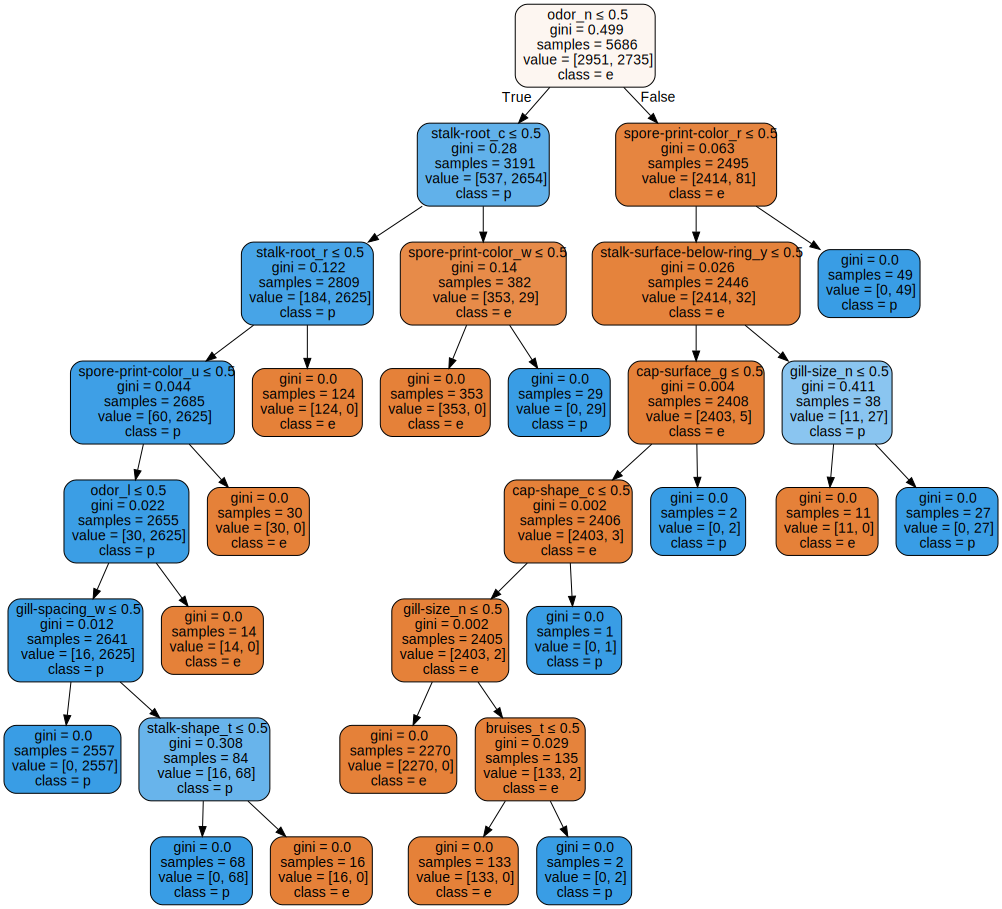


Huỳnh Thị Trúc Lam - 6351071040


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Xuất cây quyết định CART sang định dạng DOT
dot_data_cart = export_graphviz(
    cart_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=[str(c) for c in cart_tree.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# Tạo đối tượng Graphviz từ chuỗi DOT
graph_cart = graphviz.Source(dot_data_cart)

print("Biểu diễn cây CART:")
display(graph_cart)

print("\nHuỳnh Thị Trúc Lam - 6351071040")

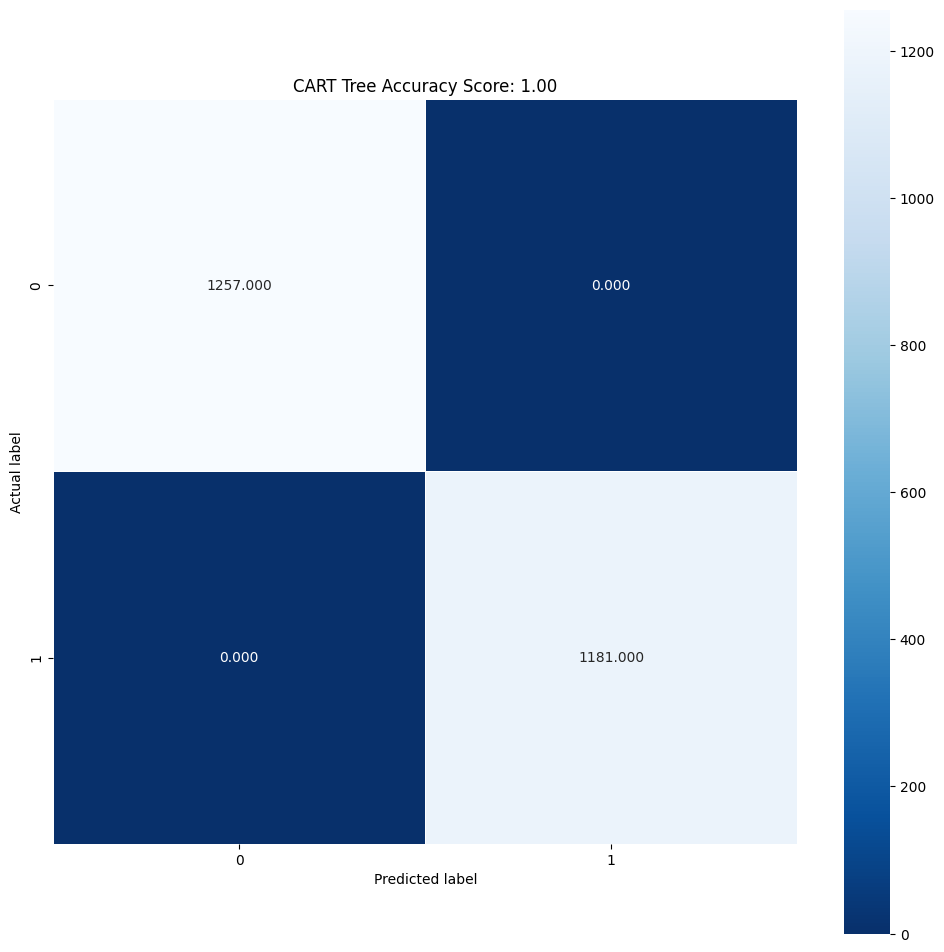


Huỳnh Thị Trúc Lam - 6351071040


In [ ]:

plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix_cart, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"CART Tree Accuracy Score: {accuracy_cart:.2f}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nHuỳnh Thị Trúc Lam - 6351071040")

**Yêu cầu 9:** Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được. Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Gaussian Naïve Bayes
naive_bayes_model = GaussianNB()

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
naive_bayes_model.fit(X_train, y_train)

print("Đã huấn luyện mô hình Naïve Bayes thành công!")
print("\nHuỳnh Thị Trúc Lam - 6351071040")

Đã huấn luyện mô hình Naïve Bayes thành công!

Huỳnh Thị Trúc Lam - 6351071040


In [ ]:
y_pred_nb = naive_bayes_model.predict(X_test)

# Tính toán và in ma trận nhầm lẫn
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("=== MA TRẬN NHẦM LẪN (Naïve Bayes) ===")
print(conf_matrix_nb)

# Tính toán và in độ chính xác
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nĐộ chính xác (Accuracy) của mô hình Naïve Bayes: {accuracy_nb:.2f}")

# In báo cáo phân loại chi tiết
print("\n=== BÁO CÁO PHÂN LOẠI (Naïve Bayes) ===")
print(classification_report(y_test, y_pred_nb))

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN NHẦM LẪN (Naïve Bayes) ===
[[1133  124]
 [   1 1180]]

Độ chính xác (Accuracy) của mô hình Naïve Bayes: 0.95

=== BÁO CÁO PHÂN LOẠI (Naïve Bayes) ===
              precision    recall  f1-score   support

           e       1.00      0.90      0.95      1257
           p       0.90      1.00      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438


Huỳnh Thị Trúc Lam - 6351071040


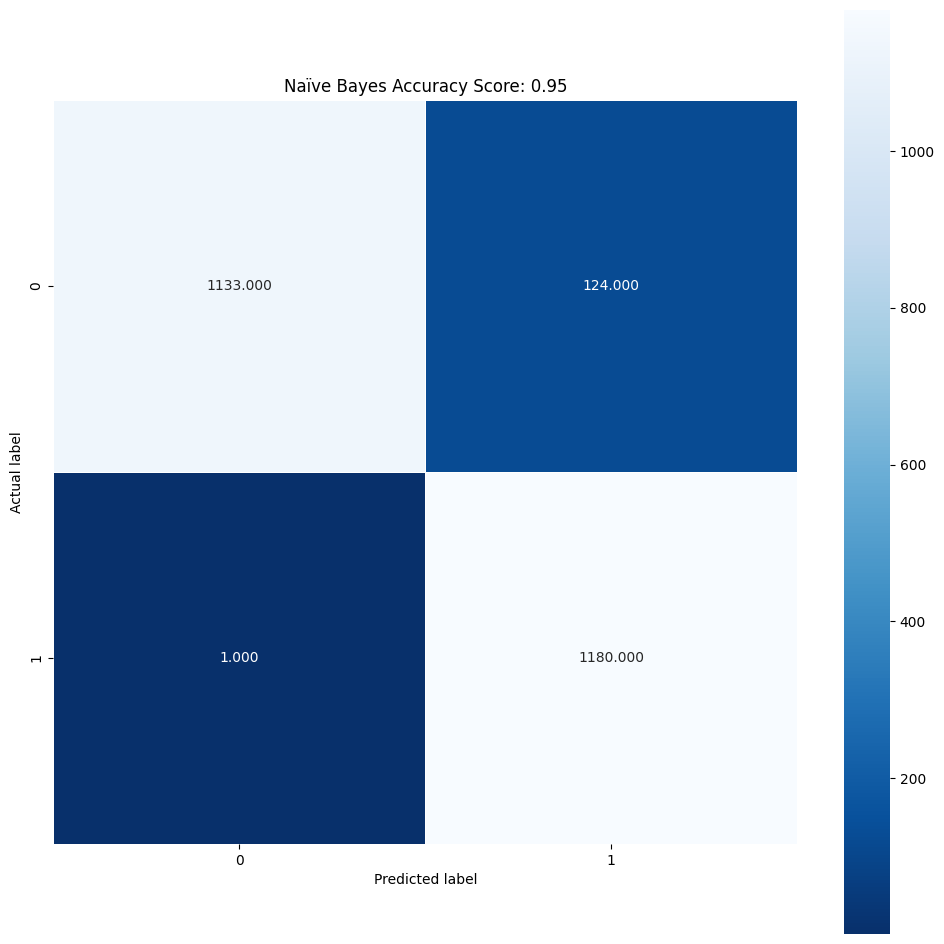


Huỳnh Thị Trúc Lam - 6351071040


In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix_nb, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"Naïve Bayes Accuracy Score: {accuracy_nb:.2f}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nHuỳnh Thị Trúc Lam - 6351071040")

**Yêu cầu 10** Dựa vào các thông tin đã thu được, sinh viên tự đưa ra nhận xét, so sánh kết quả của các mô hình trên.

| Mô hình       | Độ chính xác (Accuracy) |
| :------------ | :---------------------- |
| **ID3**       | 1.00                    |
| **CART**      | 1.00                    |
| **Naïve Bayes** | 0.95                    |

### Nhận xét:

Dựa trên kết quả độ chính xác:

*   **Mô hình ID3** và **Mô hình CART** đều cho thấy hiệu suất xuất sắc với độ chính xác tuyệt đối là **1.00**, cho thấy cả hai mô hình đều dự đoán đúng tất cả các mẫu trong tập kiểm thử.
*   **Mô hình Naïve Bayes** có độ chính xác là **0.95**, thấp hơn một chút so với ID3 và CART nhưng vẫn là một kết quả rất tốt.

Trong trường hợp này, cả ID3 và CART đều đạt được độ chính xác hoàn hảo. Điều này có thể chỉ ra rằng tập dữ liệu dễ phân loại đối với các mô hình cây quyết định, hoặc mô hình đã học quá khớp (overfitting) trên tập huấn luyện nếu không có các kỹ thuật điều chuẩn (regularization) được áp dụng. Naïve Bayes tuy có độ chính xác thấp hơn nhưng vẫn là một thuật toán mạnh mẽ và có thể hoạt động tốt trên các tập dữ liệu khác nhau.